In [1]:
from transformers import GPT2LMHeadModel

/home/okumoto-sho/python_ml_template/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
head_model = GPT2LMHeadModel.from_pretrained("gpt2")

In [5]:
state_dict_head = head_model.state_dict()
for k, v in state_dict_head.items():
  print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [6]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2025-07-13 17:55:34--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8002::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.1s    

2025-07-13 17:55:35 (10.7 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [8]:
with open("input.txt", "r") as f:
    text = f.read()
text = text[:1000]

In [9]:
import math

def cosine_scheduler_lr(steps: int, warmup_steps: int = 10, max_steps: int = 50, max_lr = 3e-4, min_lr_ratio: float = 0.1):
  min_lr = min_lr_ratio * max_lr
  if steps < warmup_steps:
    return (1 + steps) / warmup_steps * max_lr
  if steps > max_steps:
    return min_lr
  
  coeff = 0.5 * (1 + math.cos(math.pi * (steps - warmup_steps) / (max_steps - warmup_steps)))
  return min_lr + coeff * (max_lr - min_lr)
  
  

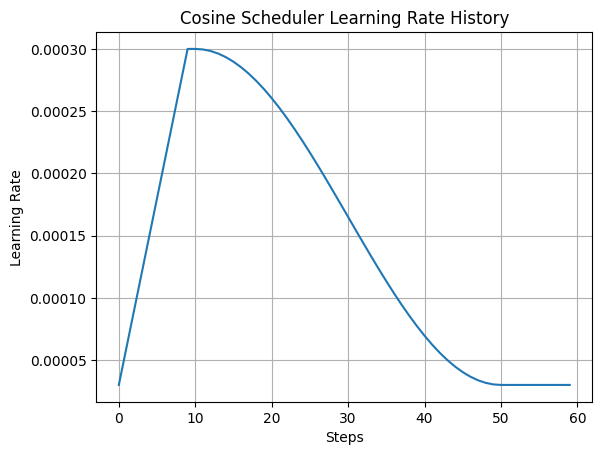

In [10]:
lr_history = []
for i in range(60):
   lr_history.append(cosine_scheduler_lr(i))

import matplotlib.pyplot as plt

plt.plot(lr_history)
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.title("Cosine Scheduler Learning Rate History")
plt.grid(True)
plt.show()

In [41]:
import torch

class Mlp(torch.nn.Module):
  def __init__(self, mid_dim = 768):
    super().__init__()
    self.linear1 = torch.nn.Linear(768, mid_dim)
    self.linear2 = torch.nn.Linear(mid_dim, 768)
    self.activation = torch.nn.GELU()
    self.register_buffer("buffer", torch.randn(768))
        
  def forward(self, x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    return x
  
mlp = Mlp()
mlp2 = Mlp()

optimizer = torch.optim.AdamW([{"params": mlp.parameters(), "lr": 3e-4}, {"params": mlp2.parameters(), "lr": 1e-3}])
print(len(optimizer.param_groups))


2


In [47]:
sum(p.numel() for p in mlp.parameters())

1181184